Deep Learning Assignment, Fractal-1

**Import necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras
from keras import applications
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split


2023-09-24 18:55:18.646069: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-24 18:55:18.647183: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 18:55:18.670393: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 18:55:18.671083: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 18:55:19.051561: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Step-1: Download any CNN model pre-trained for the ImageNet classification task.

In [7]:
# importing libraries and RESNET50 from keras
RESNET_Model = applications.resnet50.ResNet50(weights='imagenet', include_top=False,input_shape=(224,224,3))
RESNET_Model.trainable = False


2023-09-24 18:53:08.945011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-24 18:53:08.945256: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


94765736/94765736 [==============================] - 7s 0us/step


Step-2 : **Download the PASCAL VOC 2011 dataset from the following link**:
http://host.robots.ox.ac.uk/pascal/VOC/voc2011/index.html

In [3]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2011/VOCtrainval_25-May-2011.tar -P data/

!tar -xf data/VOCtrainval_25-May-2011.tar -C data/

--2023-09-16 05:02:12--  http://host.robots.ox.ac.uk/pascal/VOC/voc2011/VOCtrainval_25-May-2011.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1765686784 (1.6G) [application/x-tar]
Saving to: ‘data/VOCtrainval_25-May-2011.tar’

VOCtrainval_25-May- 100%[===================>]   1.64G  25.8MB/s    in 59s     

2023-09-16 05:03:12 (28.4 MB/s) - ‘data/VOCtrainval_25-May-2011.tar’ saved [1765686784/1765686784]



**Set up folder path**

In [4]:
datasetPath = "data/TrainVal/VOCdevkit/VOC2011"

Pick any one category of your choice from the dataset. From the training set, randomly
select 20%-50% (at least 20% and at most 50%) images that belong to this category (call it
category ‘A’), and randomly select 10% images each from all the remaining categories (call it
category “not A”). This will be the training dataset.

**0 is Class A**<br>
**1 is Class "NotA"**

In [5]:
# Choose a percentage between 20 and 50
percentage = 43
print(f"Percentage: {percentage}%")

# Calculate the number of images to select from category 'A'
num_images = round(percentage / 100 * 285)
print(f"Number of images: {num_images}")

# Load the list of image names from category 'A'
# You can use the ImageSets folder in the dataset to get the list
with open(datasetPath+"/ImageSets/Main/aeroplane_train.txt") as f:
    image_names = [line.split()[0] for line in f if line.split()[1] == "1"]

# Sample num_images images from category 'A'
sampled_images = random.sample(image_names, num_images)
img_list = []
for img in sampled_images:
  img_list.append([img,"0"])


Percentage: 43%
Number of images: 123


In [6]:
# Define the list of categories
categories = ["bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

# Loop over the categories except category 'A'
for category in categories:
    if category != "aeroplane":
        # Load the list of image names from category
        with open(datasetPath+f"/ImageSets/Main/{category}_train.txt") as f:
            image_names = [line.split()[0] for line in f if line.split()[1] == "1"]

        # Calculate the number of images(10%) to select from category
        num_images = round(0.1 * len(image_names))
        print(f"Number of images from {category}: {num_images}")

        # Sample num_images images from category
        sampled_images = random.sample(image_names, num_images)
        #print(f"Sampled images from {category}: {sampled_images}")
        for img in sampled_images:
          img_list.append([img,"1"])



Number of images from bicycle: 27
Number of images from bird: 40
Number of images from boat: 26
Number of images from bottle: 36
Number of images from bus: 21
Number of images from car: 59
Number of images from cat: 54
Number of images from chair: 57
Number of images from cow: 15
Number of images from diningtable: 27
Number of images from dog: 63
Number of images from horse: 24
Number of images from motorbike: 26
Number of images from person: 199
Number of images from pottedplant: 27
Number of images from sheep: 17
Number of images from sofa: 26
Number of images from train: 27
Number of images from tvmonitor: 29


In [7]:
# Add the selected images to dataframe with their corresponding labels

data = pd.DataFrame(img_list,columns=['Image', 'Label'])
print(data)

           Image Label
0    2008_008507     0
1    2008_007629     0
2    2008_008247     0
3    2008_008345     0
4    2010_000939     0
..           ...   ...
918  2008_000309     1
919  2009_001779     1
920  2009_000722     1
921  2010_005133     1
922  2010_004429     1

[923 rows x 2 columns]


In [8]:
#Suffel data to reduce underfitting during training
data = data.sample(frac=1).reset_index(drop=True)
print(data)

           Image Label
0    2010_002254     1
1    2008_000764     1
2    2009_000547     1
3    2011_000347     1
4    2008_008745     1
..           ...   ...
918  2010_000549     0
919  2008_007252     1
920  2009_002145     1
921  2011_001791     1
922  2008_005929     1

[923 rows x 2 columns]


**Get Training Data**

In [44]:
image_names = data["Image"].values
labels = data["Label"]

# Define a transform to resize and normalize the images
transform = Sequential([
    keras.layers.experimental.preprocessing.Resizing(224, 224),
    keras.layers.experimental.preprocessing.Rescaling(1./255),
    keras.layers.experimental.preprocessing.Normalization(
        mean=[0.485, 0.456, 0.406],
        variance=[0.229**2, 0.224**2, 0.225**2]
    )
])

def GetData(img_list,label_list):
  # Initialize an empty list to store the images
  images = []
  # Loop over the image names
  for image_name in img_list:
    # Load the image from the JPEGImages folder in the dataset
    image = tf.io.read_file(f"data/TrainVal/VOCdevkit/VOC2011/JPEGImages/{image_name}.jpg")

    # Decode the image as a tensor
    image = tf.image.decode_jpeg(image)

    # Apply the transform to the image
    image = transform(image)

    # Append the image to the list of images
    images.append(image)

  # Convert the list of images to a numpy array
  images = np.array(images)
  return images, np.array(label_list).astype("float64")

X_data, y_data = GetData(image_names,labels)


In [45]:
def printClass(catagory):
  if catagory == 0:
    return "Aeroplane(Class A)"
  else:
    return "Not Aeroplane(Class Not A)"

**Sanity check of the training and val data**

Class in test data is: Not Aeroplane(Class Not A)


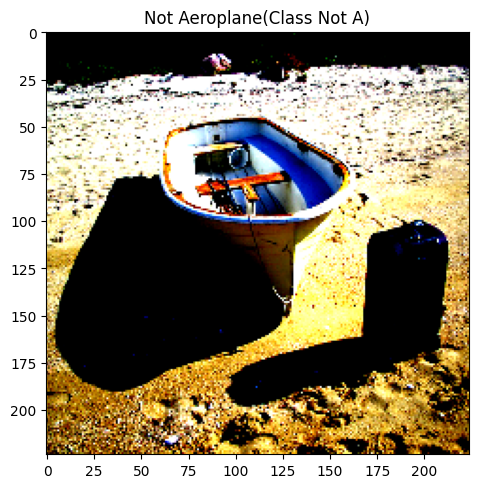

In [50]:
image_number = random.randint(0, len(X_data))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title(printClass(y_data[image_number]))
plt.imshow(X_data[image_number])
print(f"Class in test data is: {printClass(y_data[image_number])}")
plt.show()

**Split the training data into train and test sets**

In [51]:
X_train, X_val, y_train, y_val =  train_test_split(X_data,y_data,test_size = 0.2)

**Checking shape of the training data**

In [53]:
print(X_train.shape)
y_train = np.asarray(y_train).astype('float64').reshape((-1,1))
print(y_train.shape)

(738, 224, 224, 3)
(738, 1)


**Get test Set from Dataset**

In [54]:
test_categories = ["aeroplane","bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
test_img_list = []
# Loop over the categories to get validation data
for category in test_categories:
      # Load the list of image names from category
      with open(datasetPath+f"/ImageSets/Main/{category}_val.txt") as f:
          image_names = [line.split()[0] for line in f if line.split()[1] == "1"]
      for img in image_names:
        if category == "aeroplane":
          test_img_list.append([img,"0"])
        else:
          test_img_list.append([img,"1"])

test_data = pd.DataFrame(test_img_list,columns=['Image', 'Label'])

test_image_names = data["Image"].values
test_labels = data["Label"]
# Calling get data method to get images in model format
X_test,y_test = GetData(test_image_names,test_labels)



**Test data sanity check**

Class in test data is: Not Aeroplane(Class Not A)


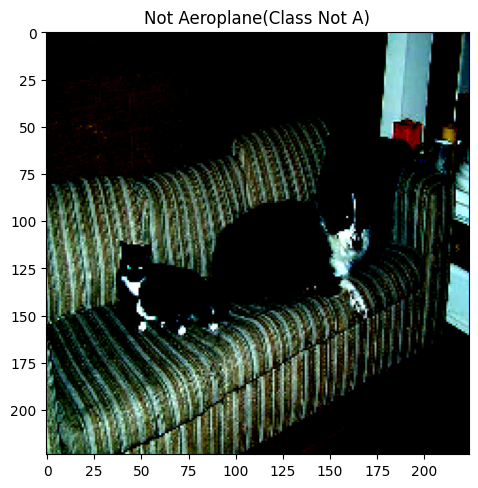

In [55]:
image_number = random.randint(0, len(X_test))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title(printClass(y_test[image_number]))
plt.imshow(X_train[image_number])
print(f"Class in test data is: {printClass(y_test[image_number])}")
plt.show()

**Define Model**

In [56]:
Modified_Model = Sequential()
Modified_Model.add(RESNET_Model)
# Add a flatten layer
Modified_Model.add(Flatten())
Modified_Model.add(Dense(1, activation="sigmoid"))

# Compile the model with categorical crossentropy loss and adam optimizer
Modified_Model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

**Compiled Model**

**Train model**

In [57]:
# Fit the model on the final features and labels
Train_History = Modified_Model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val,y_val))

Epoch 1/10
24/24 [==============================] - 115s 5s/step - loss: 1.1235 - accuracy: 0.8455 - val_loss: 0.5286 - val_accuracy: 0.9027
Epoch 2/10
24/24 [==============================] - 103s 4s/step - loss: 0.4547 - accuracy: 0.9336 - val_loss: 0.9096 - val_accuracy: 0.9297
Epoch 3/10
24/24 [==============================] - 102s 4s/step - loss: 0.0836 - accuracy: 0.9729 - val_loss: 0.9377 - val_accuracy: 0.9081
Epoch 4/10
24/24 [==============================] - 123s 5s/step - loss: 0.0284 - accuracy: 0.9864 - val_loss: 0.8095 - val_accuracy: 0.9135
Epoch 5/10
24/24 [==============================] - 108s 5s/step - loss: 0.0263 - accuracy: 0.9878 - val_loss: 0.9505 - val_accuracy: 0.8973
Epoch 6/10
24/24 [==============================] - 102s 4s/step - loss: 0.0089 - accuracy: 0.9986 - val_loss: 0.7352 - val_accuracy: 0.9243
Epoch 7/10
24/24 [==============================] - 124s 5s/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.7332 - val_accuracy: 0.9243
Epoch 8/10
24

**Training Results**

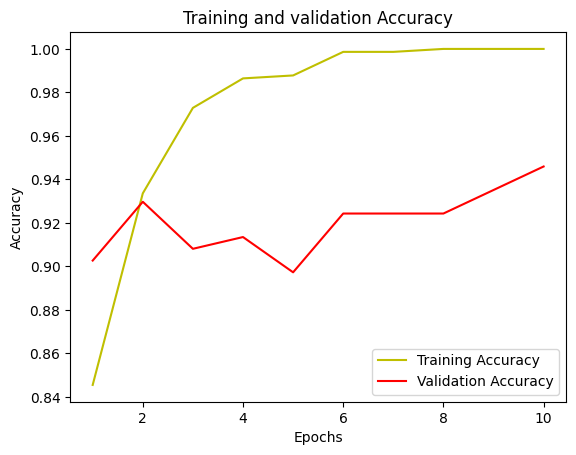

In [59]:
# plotting train and val accuracy in each epoch
accuracy = Train_History.history['accuracy']
val_accuracy = Train_History.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Validate Modified RESTNET50 model on test data which is trained on our data**

In [74]:
prediction_ModifiedModel = Modified_Model.predict(X_test)

29/29 [==============================] - 104s 4s/step


1/1 [==============================] - 0s 131ms/step


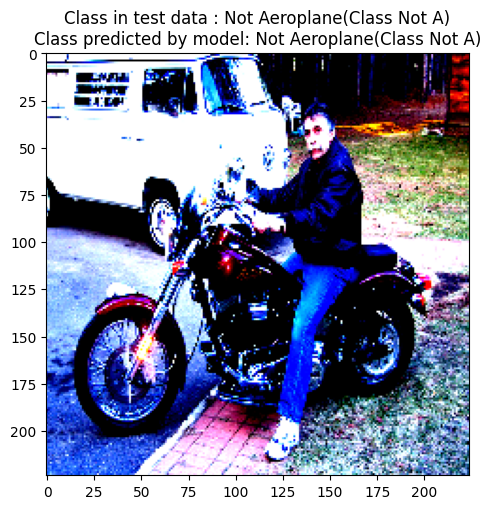

In [75]:
image_number = random.randint(0, len(X_test))
IndividualTest = Modified_Model.predict(np.array([X_test[image_number]]))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title(f"Class in test data : {printClass(y_test[image_number])}\n"+f"Class predicted by model: {printClass(np.round_(IndividualTest[0]))}")
plt.imshow(X_test[image_number])
plt.show()

**Post prediction results**

In [76]:
# Convert float values to binary
prediction_ModifiedModel = (np.round_(prediction_ModifiedModel)).reshape(-1)

# Import metrics functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print accuracy
accuracy = accuracy_score(y_test, prediction_ModifiedModel)
print(f"Accuracy: {accuracy}")

# Calculate and print precision
precision = precision_score(y_test, prediction_ModifiedModel)
print(f"Precision: {precision}")

# Calculate and print recall
recall = recall_score(y_test, prediction_ModifiedModel)
print(f"Recall: {recall}")

# Calculate and print f1-score
f1 = f1_score(y_test, prediction_ModifiedModel)
print(f"F1-score: {f1}")

Accuracy: 0.9880823401950163
Precision: 0.9876390605686032
Recall: 0.99875
F1-score: 0.9931634555624611


# **Step-4**
*Use the entire validation set and represent these images in the same way as done in
step-4. Evaluate the classification accuracy of the kNN classifier on this set. Analyze the results
by varying different hyper-parameters such as the choice of distance/similarity function, value of
‘k’, feature normalization, etc. Provide the confusion matrix in all the cases.*

**Here, Doing classification using KNN classifier**

In [84]:
from sklearn import metrics
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**Reshaping the input dataset for classification**

In [88]:
nsamples, nx, ny,depth = X_train.shape
knn_train_dataset = X_train.reshape((nsamples,nx*ny*depth))
ntestsamples, nx, ny,depth = X_test.shape
knn_test_dataset = X_test.reshape((ntestsamples,nx*ny*depth))

**Defining KNN Classifier**

In [89]:
# Define a kNN classifier with k=5 and euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

Training KNN Classifer

In [90]:
# Fit the classifier on the training features and labels
knn_history = knn.fit(knn_train_dataset, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [92]:
# Predict the labels for the validation features
val_pred = knn.predict(knn_test_dataset)

# Evaluate the classification accuracy on the validation set
val_acc = sklearn.metrics.accuracy_score(y_test, val_pred)
print(f"Validation accuracy: {val_acc}")

# Provide the confusion matrix on the validation set
val_cm = sklearn.metrics.confusion_matrix(y_test, val_pred)
print(f"Confusion matrix: \n{val_cm}")


Validation accuracy: 0.7973997833152763
Confusion matrix: 
[[ 95  28]
 [159 641]]


**Ploting decision boundry**